<a href="https://colab.research.google.com/github/ElioRame/ProgrammingAssignment2/blob/master/PALS0039_Ex_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![PALS0039 Logo](https://www.phon.ucl.ac.uk/courses/pals0039/images/pals0039logo.png)](https://www.phon.ucl.ac.uk/courses/pals0039/)

#Exercise 5.1 WordNet and SimLex-999

In this exercise, we investigate [WordNet](https://wordnet.princeton.edu/) and [SimLex-999](https://fh295.github.io/simlex.html) to explore the relationships between words.

[Description of the WordNet functions in NLTK](https://www.nltk.org/howto/wordnet.html).

[Description of SimLex-999](https://www.phon.ucl.ac.uk/courses/pals0039/data/exercise_05/simlex-readme.txt)

---
Download and import WordNet using NLTK. Run the code.

In [7]:
import nltk
# Download the wordnet corpus
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


---
The following code prints out the synsets for the list of words below, note how the parts-of-speech (POS) are represented.

(a) Print out the definition of the **first synset** for each word with the following POS:
- old (adjective)
- husband (noun)
- go (verb)

In [15]:
words = ["old", "husband", "go"]

for word in words:
  synsets = wn.synsets(word)
  print(synsets)

#(a)
#ANSWER
old_a = []
old_a.append(wn.synsets("old", pos = wn.ADJ))


husband_n = []
husband_n.append(wn.synsets("husband", pos = wn.NOUN))

go_v = []
go_v.append(wn.synsets("go", pos = wn.VERB))

print(old_a[0][0].definition(), husband_n[0][0].definition(), go_v[0][0].definition())

[Synset('old.n.01'), Synset('old.a.01'), Synset('old.a.02'), Synset('old.s.03'), Synset('old.s.04'), Synset('erstwhile.s.01'), Synset('honest-to-god.s.01'), Synset('old.s.07'), Synset('previous.s.01')]
[Synset('husband.n.01'), Synset('conserve.v.03')]
[Synset('go.n.01'), Synset('adam.n.03'), Synset('crack.n.09'), Synset('go.n.04'), Synset('travel.v.01'), Synset('go.v.02'), Synset('go.v.03'), Synset('become.v.01'), Synset('go.v.05'), Synset('run.v.05'), Synset('run.v.03'), Synset('proceed.v.04'), Synset('go.v.09'), Synset('go.v.10'), Synset('sound.v.02'), Synset('function.v.01'), Synset('run_low.v.01'), Synset('move.v.13'), Synset('survive.v.01'), Synset('go.v.16'), Synset('die.v.01'), Synset('belong.v.03'), Synset('go.v.19'), Synset('start.v.09'), Synset('move.v.15'), Synset('go.v.22'), Synset('go.v.23'), Synset('blend.v.02'), Synset('go.v.25'), Synset('fit.v.02'), Synset('rifle.v.02'), Synset('go.v.28'), Synset('plump.v.04'), Synset('fail.v.04'), Synset('go.a.01')]
(used especially of

---
The following code loads the **SimLex-999** table and explores some rows and values. Refer to the description of columns [here](https://www.phon.ucl.ac.uk/courses/pals0039/data/exercise_05/simlex-readme.txt).


In [16]:
import pandas as pd

simlex = pd.read_csv('https://www.phon.ucl.ac.uk/courses/pals0039/data/exercise_05/simlex-999.csv.bz2')
simlex

,WORD1,WORD2,POS,SIMILARITY,CONCRETE1,CONCRETE2,CONCQUART,FREEASSOC,SIMASSOC333,SDSIMILARITY
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93
...,...,...,...,...,...,...,...,...,...,...
994,join,acquire,V,2.85,2.86,2.93,2,0.00,0,0.99
995,send,attend,V,1.67,2.70,3.17,2,0.00,0,1.44
996,gather,attend,V,4.80,2.75,3.17,2,0.00,0,1.97
997,absorb,withdraw,V,2.97,3.11,3.04,2,0.00,0,1.75


---
(b) Add a new column to the dataframe called "WNSIMILARITY" and populate it with your choice of similarity measure implemented in NLTK's WordNet implementation (e.g. [`wup_similarity`](https://www.nltk.org/api/nltk.corpus.reader.wordnet.html?highlight=wordnet#nltk.corpus.reader.wordnet.Synset.wup_similarity)). Simply use the first SynSet of the word with the correct POS, as done in (a).

In [19]:
#(b)
#ANSWER
simlex["WNSIMILARITY"] = 0.0

#Populate it with WordNet's path_similarity:
for row_index in range(len(simlex)):
  word1, word2, pos = simlex.iloc[row_index][["WORD1", "WORD2", "POS"]]
  synset1 = wn.synset(f"{word1}.{pos.lower()}.01")
  synset2 = wn.synset(f"{word2}.{pos.lower()}.01")
  simlex.loc[row_index, "WNSIMILARITY"] = synset1.wup_similarity(synset2)

simlex

,WORD1,WORD2,POS,SIMILARITY,CONCRETE1,CONCRETE2,CONCQUART,FREEASSOC,SIMASSOC333,SDSIMILARITY,POSIDX,WNSIMILARITY
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41,0,0.500000
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67,0,0.500000
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19,0,1.000000
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18,0,0.500000
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93,0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
994,join,acquire,V,2.85,2.86,2.93,2,0.00,0,0.99,2,0.500000
995,send,attend,V,1.67,2.70,3.17,2,0.00,0,1.44,2,0.333333
996,gather,attend,V,4.80,2.75,3.17,2,0.00,0,1.97,2,0.400000
997,absorb,withdraw,V,2.97,3.11,3.04,2,0.00,0,1.75,2,0.250000


(c) Use a scatterplot to visualise the agreement between WordNet similarities (`WNSIMILARITY`) and the SimLex ratings (`SIMILARITY`).

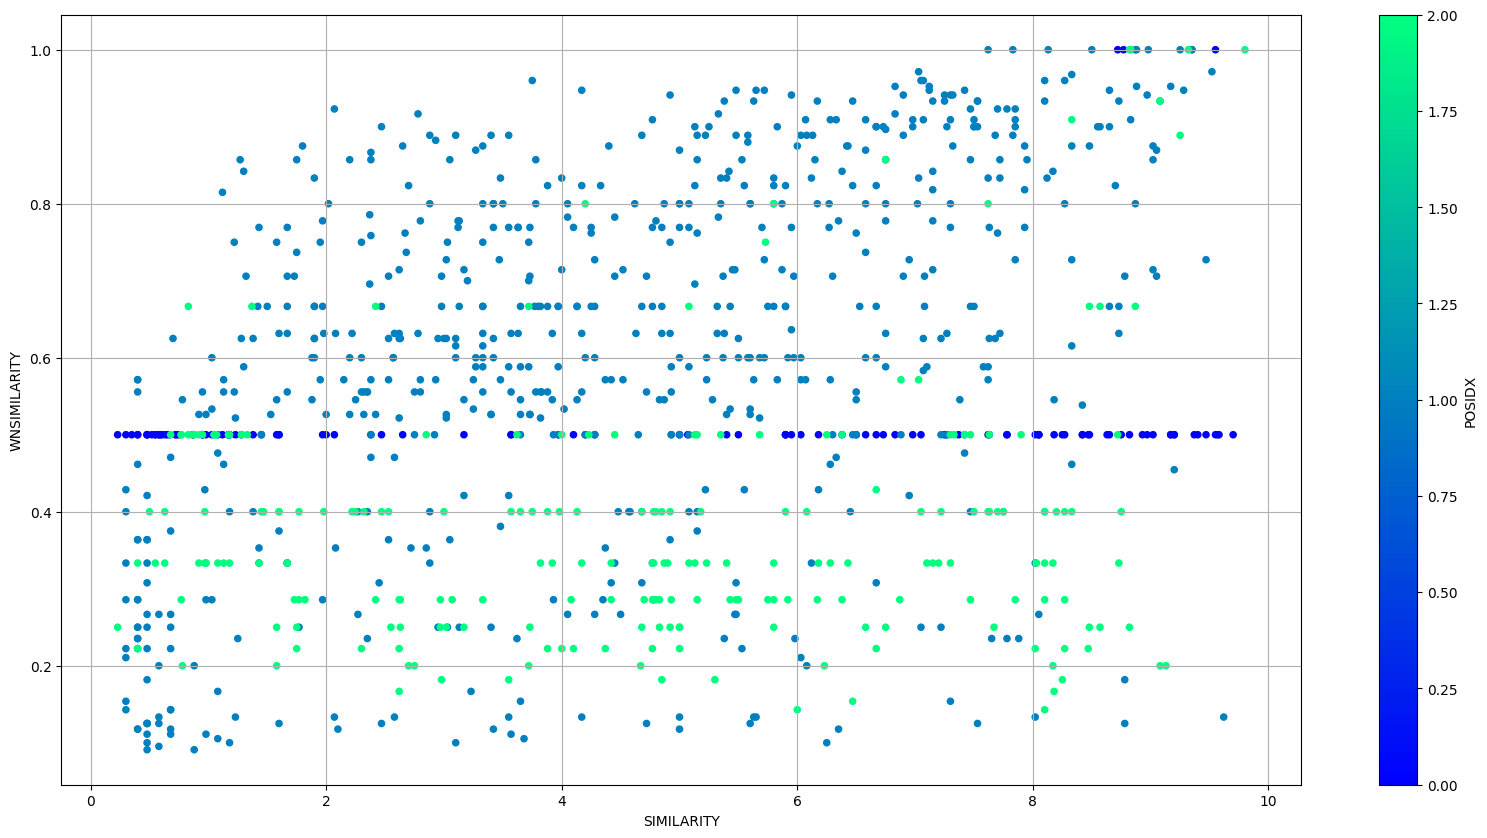

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

#(c)
#ANSWER
simlex["POS"] = simlex.POS.astype("category")
simlex["POSIDX"] = simlex.POS.cat.codes
simlex.plot.scatter(x="SIMILARITY", y="WNSIMILARITY", c="POSIDX", cmap="winter", figsize=(20, 10), grid=True)
plt.show()

(d) Comment on the granularity of the values, level of agreement (you may calculate correlations) and possible reasons for mismatches.

In [22]:
#(d)
from scipy.stats import pearsonr
#ANSWER
#(d)
# - Ratings are more fine-grained
# - Rough agreement (however, many disagreements)
# - We did not take care to select the most appropriate sense from WordNet...

valid_idx = simlex["WNSIMILARITY"].notnull()
pearson_correlation = pearsonr(simlex["SIMILARITY"][valid_idx], simlex["WNSIMILARITY"][valid_idx])[0]
print("Correlation:", pearson_correlation)

Correlation: 0.3220047480823578
